# Bienaymé's Identity/Formula - Proof

We want to prove $Var(x)+Var(y)=Var(x+y)$ where $x$ and $y$ are both variables, independent of each other, and of the same distribution. ($x+y=\Sigma_{i=1}^{n(x)}\Sigma_{j=1}^{n(y)}(x+y)$)

Notes:
- $\equiv$ means "by definition"

## Lemma $Var(x)=E(x^2)-(E(x))^2$

$Var(x)=\frac{\Sigma(x_i-\mu)^2}{N}$ where $N$ is the number of values in the population.

$=E((x-\mu)^2)$

$=E(x^2-2x\mu+\mu^2)$

$=E(x^2)-2\mu E(x)+E(\mu^2)$ ($E(ay)=\frac{\Sigma_i(ay_i)}{n(y)}=a\frac{\Sigma_i(y_i)}{n(y)}=aE(y)$ where $a$ is a constant, and $n(y)$ is the number of values in $y$)

$=E(x^2)-2\mu E(x)+\mu^2$ (expected value of a constant is itself)

$=E(x^2)-2E^2(x)+E^2(x)$ ($E(x)=\mu$)

$=E(x^2)-E^2(x)$

## Lemma $E(x)E(y)=E(xy)$ if $x$ and $y$ are independent

$E(xy)$

$=\Sigma_{i=1}^{n(x)}\Sigma_{j=1}^{n(y)}(x_iy_j)P(x_i\land y_j)$

$=\Sigma_i\Sigma_j(x_iy_j)P(x_i\land y_j)$ ($\Sigma_i\equiv\Sigma_{i=1}^{n(x)}$, $\Sigma_j\equiv\Sigma_{j=1}^{n(y)$)

$=\Sigma_i\Sigma_j(x_iy_j)P(x_i)P(y_j)$

$=\Sigma_i(x_iP(x_i)\Sigma_j(y_j)P(y_j))$ ($i$ is constant with respect to $j$)

$=(\Sigma_iP(x_i)x_i)(\Sigma_jP(y_j)y_j)$ ($j$ is constant with respect to $i$)

Put another way:

$f(x)\equiv g(x)\equiv P(x)x$

$\text{map}(f,x)$ is a vector.

$\text{sm}(x)\equiv(\text{sum}\circ\text{map})(x)\equiv\Sigma\text{map}(x)$

$\text{sm}(f,x\cdot\text{map}(g,y))$
$=\text{sm}(g,y)\cdot\text{sm}(f,x)$

## Proof

$Var(x+y)$

$=E((x+y)^2)-(E(x+y))^2$ (using the above lemma)

$=E(x^2+2xy+y^2)-(E(x)+E(y))^2$

$=E(x^2)+2E(xy)+E(y^2)-E^2(x)-2E(x)E(y)-E^2(y)$

$=E(x^2)-E^2(x)+E(y^2)-E^2(y)+2E(xy)-2E(x)E(y)$

$=Var(x)+Var(y)-2E(xy)-2E(x)E(y)$ (using the above lemma)

$=Var(x)+Var(y)$ ($E(xy)=E(x)E(y)$ using the above lemma)

## General Form of Bienayme's Formula/Identity



m = 5.57
var = 8.705100000000009


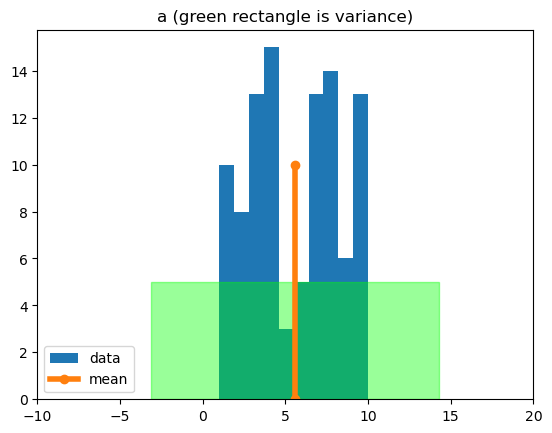

m = 5.27
var = 8.517100000000001


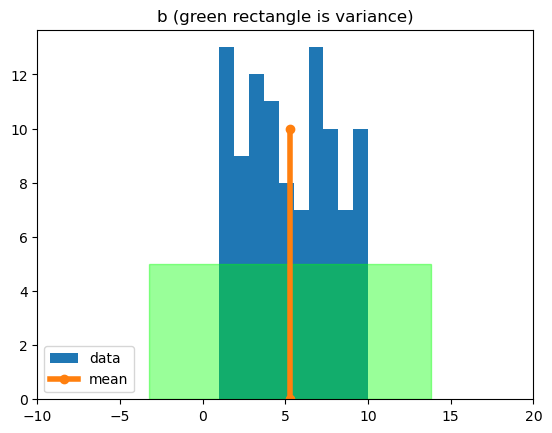

cov = 2.6017347647781447e-14
m = 10.84
var = 17.222199999999585


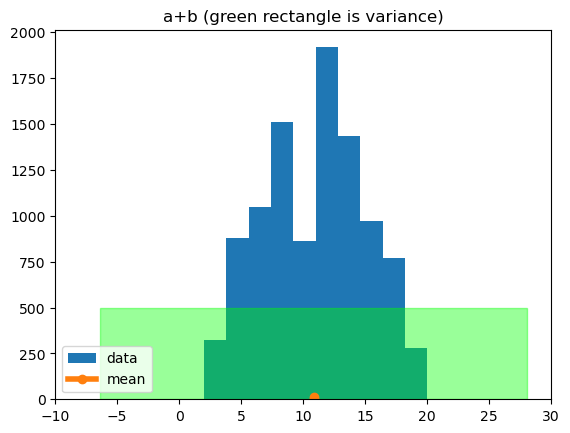

In [90]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches


def generate_random_points(n=100):
    return [choice(range(1, 11)) for _ in range(n)]

mean = lambda data: sum(data)/len(data)

def variance(data):
    m = mean(data)
    return sum((value-m)**2 for value in data)/len(data)

def covariance(x, y):
    assert len(x)==len(y)
    m_x = mean(x)
    m_y = mean(y)
    return sum((x_i-m_x)*(y_i-m_y) for x_i in x for y_i in y)/(len(x)-1)

def plot_this_thing(data, xlim=[-10, 20], title=None):
    fig, ax = plt.subplots()
    plt.hist(data, label='data')
    m = mean(data)
    print(f'm = {m}')
    plt.plot((m, m), (0, 10), marker='o', linewidth=4, label='mean')
    plt.legend(loc='lower left')
    var = variance(data)
    print(f'var = {var}')
    rect = patches.Rectangle((m-var, 0), var*2, len(data)/10/2, color='#00ff0066')
    ax.add_patch(rect)
    variance(data)
    plt.xlim(*xlim)
    plt.title(title)
    plt.show()
    plt.close()

'''
plot_this_thing(generate_random_points(n=40000))
'''


# a = generate_random_points(n=100000)
# b = generate_random_points(n=100000)
# c = list(a[i]+b[i] for i in range(len(a)))
# # print(f'a = {a}')
# # print(f'b = {b}')
# # print(f'c = {c}')
# print(f'{variance(a)+variance(b)} == {variance(c)}')

a = generate_random_points()
b = generate_random_points()
# print(f'a = {a}')
# print(f'b = {b}')
plot_this_thing(a, title='a (green rectangle is variance)')
plot_this_thing(b, title='b (green rectangle is variance)')
print(f'cov = {covariance(a, b)}')
assert len(a) == len(b)
plot_this_thing(list(a[i]+b[j] for i in range(len(a)) for j in range(len(b))), xlim=[-10, 30], title='a+b (green rectangle is variance)')

In [77]:
variance([1, 2, 3])+variance([4, 5, 6])

4/3

In [79]:
variance([1+4, 1+5, 1+6, 2+4, 2+5, 2+6, 3+4, 3+5, 3+6])

4/3